In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
pd.options.display.mpl_style = 'default'
data_id1 = 19
data_id2 = 20
Xtrain1 = pd.read_csv('/home/loschen/Desktop/datamining-kaggle/numerai/data/numerai_datasets_'+str(data_id1)+'/numerai_training_data.csv')
Xtrain2 = pd.read_csv('/home/loschen/Desktop/datamining-kaggle/numerai/data/numerai_datasets_'+str(data_id2)+'/numerai_training_data.csv')
Xtrain1.drop(['target'],axis=1,inplace=True)
Xtrain2.drop(['target'],axis=1,inplace=True)
Xtrain2.columns = [x+'_b' for x in Xtrain2.columns]
print Xtrain1.shape
print Xtrain2.shape
#Xtrain = pd.concat([Xtrain[['feature1']], Xtrain2], ignore_index=True)


(96320, 21)
(96320, 21)


sorted 1: Index([u'feature16', u'feature4', u'feature20', u'feature21', u'feature2',
       u'feature12', u'feature10', u'feature7', u'feature14', u'feature11',
       u'feature8', u'feature9', u'feature5', u'feature13', u'feature19',
       u'feature15', u'feature1', u'feature6', u'feature18', u'feature3',
       u'feature17'],
      dtype='object')
sorted 2: Index([u'feature15_b', u'feature5_b', u'feature6_b', u'feature8_b',
       u'feature1_b', u'feature13_b', u'feature14_b', u'feature11_b',
       u'feature20_b', u'feature4_b', u'feature9_b', u'feature10_b',
       u'feature2_b', u'feature19_b', u'feature21_b', u'feature7_b',
       u'feature3_b', u'feature17_b', u'feature18_b', u'feature12_b',
       u'feature16_b'],
      dtype='object')


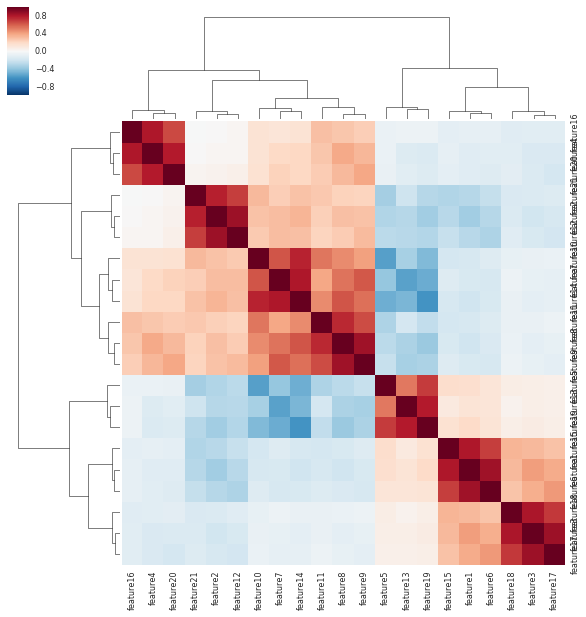

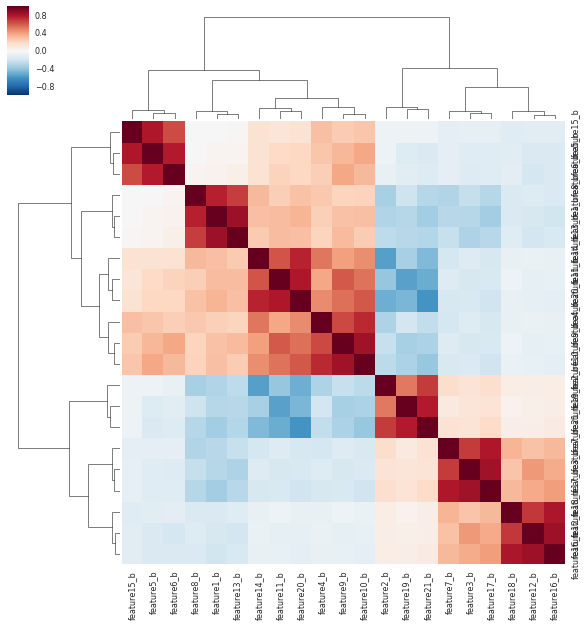

In [16]:
corr_train = pd.DataFrame(Xtrain1).corr()
#corr_pred = pd.DataFrame(X_pred).corr()
#corr_both = pd.DataFrame(X_both).corr()

sns.set(context="paper", font="monospace")
m = sns.clustermap(corr_train)



corr_train2 = pd.DataFrame(Xtrain2).corr()
#corr_pred = pd.DataFrame(X_pred).corr()
#corr_both = pd.DataFrame(X_both).corr()

m2 = sns.clustermap(corr_train2)

print "sorted 1:",m.data2d.columns
print "sorted 2:",m2.data2d.columns

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

Xf1 = Xtrain1.values.T
Xf2 = Xtrain2.values.T

est1 = KMeans(n_clusters=7, n_jobs=4)
est1.fit(Xf1)
labels1 = est1.labels_

est2 = KMeans(n_clusters=7, n_jobs=4)
est2.fit(Xf2)
labels2 = est2.labels_

clustered1 = []
clustered2 = []
for i in xrange(7):
     clustered1.append(list(Xtrain1.columns[labels1==i].values))
     clustered2.append(list(Xtrain2.columns[labels2==i].values))  
    
print clustered1
print clustered2


    


        

[['feature1', 'feature11', 'feature16'], ['feature5', 'feature12', 'feature15'], ['feature6', 'feature8', 'feature13'], ['feature3', 'feature9', 'feature21'], ['feature4', 'feature17', 'feature20'], ['feature2', 'feature7', 'feature14'], ['feature10', 'feature18', 'feature19']]
[['feature4_b', 'feature16_b', 'feature20_b'], ['feature1_b', 'feature6_b', 'feature15_b'], ['feature2_b', 'feature12_b', 'feature21_b'], ['feature7_b', 'feature10_b', 'feature14_b'], ['feature5_b', 'feature13_b', 'feature19_b'], ['feature3_b', 'feature17_b', 'feature18_b'], ['feature8_b', 'feature9_b', 'feature11_b']]


In [ ]:
for c1 in clustered1:
    for c2 in clustered1:
        print c1
        print c2
        print 
        cvm = np.cov(Xtrain1.loc[:100,c1].values,Xtrain1.loc[:100,c2].values,rowvar=False)
        print cvm.shape
        print cvm


        raw_input()
        

['feature8', 'feature11', 'feature20']
['feature5_b', 'feature7_b', 'feature16_b']
(6,)
feature11     NaN
feature16_b   NaN
feature20     NaN
feature5_b    NaN
feature7_b    NaN
feature8      NaN
dtype: float64


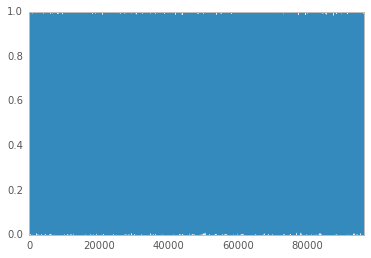

In [19]:
Xtrain.iloc[:,:].hist(bins=20)
plt.show()
Xtrain[['feature1','feature2','feature3']].plot(kind='box')

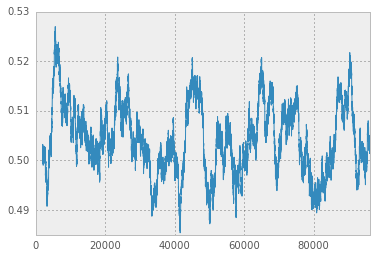

In [41]:
pd.rolling_mean(Xtrain['feature2'],2000).plot()

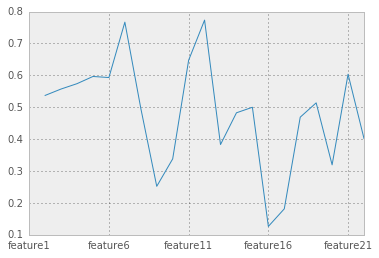

In [37]:
pd.rolling_mean(Xtrain.iloc[2,:],2).plot()

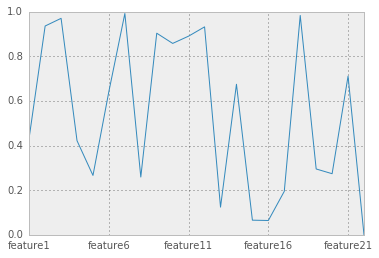

In [29]:
Xtrain.iloc[0,:].plot()

In [57]:
rm = Xtrain.apply(pd.rolling_mean,args=(1000),axis=0)

TypeError: ('roll_mean() argument after * must be a sequence, not int', u'occurred at index feature1')

In [53]:
rm.shape


(2, 22)

In [54]:
type(rm)

pandas.core.frame.DataFrame

rm

In [55]:
rm

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
pd.rolling_count

AttributeError: 'module' object has no attribute 'rolling'